# EEG Emotion Recognition on GAMEEMO

This notebook trains a lightweight **MSDCGTNet** model on the GAMEEMO EEG dataset to classify four game‑evoked emotions:

| Label | ID | Description |
|-------|----|-------------|
| 0 | G1 | Boring |
| 1 | G2 | Calm |
| 2 | G3 | Horror |
| 3 | G4 | Funny |

Run the notebook top‑to‑bottom to:

1. Download and organise the data  
2. Build subject‑wise train / validation splits  
3. Train MSDCGTNet with early stopping & mixed precision  
4. Inspect metrics and a confusion matrix  

## About the GAMEEMO dataset

* **28 subjects** recorded with a 14‑channel Emotiv Epoc + headset  
* **4 five‑minute sessions** per subject – each labelled *Boring*, *Calm*, *Horror* or *Funny*  
* Data provided as **pre‑processed CSV** (clean, notch‑filtered, 256 Hz)

The goal is to recognise the game‑elicited emotion from raw EEG.  
We evaluate with a **subject‑wise split** to report true generalisation to unseen people.

## 0 Setup & data download

In [1]:
from pathlib import Path
import subprocess, sys

DATA_ROOT = Path("../data/GAMEEMO")
DATA_ROOT.mkdir(parents=True, exist_ok=True)

if not any(DATA_ROOT.rglob("*.csv")):
    print("Downloading GAMEEMO")
    try:
        subprocess.run([
            "kaggle", "datasets", "download",
            "-d", "sigfest/database-for-emotion-recognition-system-gameemo",
            "-p", str(DATA_ROOT.parent), "--unzip",
        ], check=True)
    except Exception as e:
        sys.stderr.write(f"⚠️ Kaggle download failed: {e}\n")
else:
    print("Dataset already present - skipping download.")

Dataset already present - skipping download.


Using device: cuda
Initializing dataset...
Found 112 recordings from 28 subjects.
Number of training samples: 90
Number of testing samples: 22


c:\Users\dmrom\emotion-recognition\.venv\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(



--- Starting Training ---


Epoch 1/50 => Train Loss: 1.3940, Train Acc: 0.2333 | Val Loss: 1.3811, Val Acc: 0.3182 | LR: 1.0e-03


Epoch 2/50 => Train Loss: 1.3558, Train Acc: 0.2889 | Val Loss: 1.3798, Val Acc: 0.3636 | LR: 1.0e-03


Epoch 3/50 => Train Loss: 1.3229, Train Acc: 0.3667 | Val Loss: 1.3840, Val Acc: 0.2273 | LR: 1.0e-03


Epoch 4/50 => Train Loss: 1.2802, Train Acc: 0.4000 | Val Loss: 1.3892, Val Acc: 0.1818 | LR: 1.0e-03


Epoch 5/50 => Train Loss: 1.2527, Train Acc: 0.4333 | Val Loss: 1.3535, Val Acc: 0.2727 | LR: 1.0e-03


Epoch 6/50 => Train Loss: 1.1701, Train Acc: 0.5556 | Val Loss: 1.3171, Val Acc: 0.4545 | LR: 1.0e-03


Epoch 7/50 => Train Loss: 1.1168, Train Acc: 0.6333 | Val Loss: 1.2838, Val Acc: 0.5455 | LR: 1.0e-03


Epoch 8/50 => Train Loss: 1.0284, Train Acc: 0.6222 | Val Loss: 1.2380, Val Acc: 0.5000 | LR: 1.0e-03


Epoch 9/50 => Train Loss: 0.9706, Train Acc: 0.6444 | Val Loss: 1.1897, Val Acc: 0.6364 | LR: 1.0e-03


Epoch 10/50 => Train Loss: 0.8961, Train Acc: 0.6333 | Val Loss: 1.1891, Val Acc: 0.5455 | LR: 1.0e-03


Epoch 11/50 => Train Loss: 0.7553, Train Acc: 0.7111 | Val Loss: 1.0924, Val Acc: 0.6364 | LR: 1.0e-03


Epoch 12/50 => Train Loss: 0.7058, Train Acc: 0.7444 | Val Loss: 1.0499, Val Acc: 0.5909 | LR: 1.0e-03


Epoch 13/50 => Train Loss: 0.5893, Train Acc: 0.8000 | Val Loss: 0.9700, Val Acc: 0.6364 | LR: 1.0e-03


Epoch 14/50 => Train Loss: 0.5636, Train Acc: 0.8000 | Val Loss: 1.1985, Val Acc: 0.5455 | LR: 1.0e-03


Epoch 15/50 => Train Loss: 0.5451, Train Acc: 0.8222 | Val Loss: 0.8539, Val Acc: 0.6818 | LR: 1.0e-03


Epoch 16/50 => Train Loss: 0.4409, Train Acc: 0.8667 | Val Loss: 0.8662, Val Acc: 0.6364 | LR: 1.0e-03


Epoch 17/50 => Train Loss: 0.4557, Train Acc: 0.8333 | Val Loss: 0.6958, Val Acc: 0.6818 | LR: 1.0e-03


Epoch 18/50 => Train Loss: 0.4276, Train Acc: 0.8333 | Val Loss: 0.6320, Val Acc: 0.7727 | LR: 1.0e-03


Epoch 19/50 => Train Loss: 0.3446, Train Acc: 0.9000 | Val Loss: 0.6063, Val Acc: 0.8636 | LR: 1.0e-03


Epoch 20/50 => Train Loss: 0.3772, Train Acc: 0.8333 | Val Loss: 0.7791, Val Acc: 0.7273 | LR: 1.0e-03


Epoch 21/50 => Train Loss: 0.2789, Train Acc: 0.9111 | Val Loss: 0.5889, Val Acc: 0.7727 | LR: 1.0e-03


Epoch 22/50 => Train Loss: 0.3461, Train Acc: 0.8667 | Val Loss: 0.4531, Val Acc: 0.8636 | LR: 1.0e-03


Epoch 23/50 => Train Loss: 0.2421, Train Acc: 0.9333 | Val Loss: 0.5396, Val Acc: 0.8636 | LR: 1.0e-03


Epoch 24/50 => Train Loss: 0.2446, Train Acc: 0.9333 | Val Loss: 0.5233, Val Acc: 0.9091 | LR: 1.0e-03


Epoch 25/50 => Train Loss: 0.3125, Train Acc: 0.9111 | Val Loss: 0.4910, Val Acc: 0.9091 | LR: 1.0e-03


Epoch 26/50 => Train Loss: 0.2207, Train Acc: 0.9444 | Val Loss: 0.3455, Val Acc: 0.9545 | LR: 1.0e-03


Epoch 27/50 => Train Loss: 0.2279, Train Acc: 0.9222 | Val Loss: 0.3911, Val Acc: 0.9091 | LR: 1.0e-03


Epoch 28/50 => Train Loss: 0.1455, Train Acc: 0.9667 | Val Loss: 0.3125, Val Acc: 0.9091 | LR: 1.0e-03


Epoch 29/50 => Train Loss: 0.2226, Train Acc: 0.9333 | Val Loss: 0.3824, Val Acc: 0.8636 | LR: 1.0e-03


Epoch 30/50 => Train Loss: 0.2131, Train Acc: 0.9222 | Val Loss: 0.3920, Val Acc: 0.8636 | LR: 1.0e-03


Epoch 31/50 => Train Loss: 0.2045, Train Acc: 0.9333 | Val Loss: 0.4124, Val Acc: 0.8182 | LR: 1.0e-03


Epoch 32/50 => Train Loss: 0.1851, Train Acc: 0.9444 | Val Loss: 0.4577, Val Acc: 0.8182 | LR: 1.0e-03


Epoch 33/50 => Train Loss: 0.0949, Train Acc: 1.0000 | Val Loss: 0.4512, Val Acc: 0.8636 | LR: 2.0e-04


Epoch 34/50 => Train Loss: 0.1285, Train Acc: 0.9778 | Val Loss: 0.4314, Val Acc: 0.8636 | LR: 2.0e-04


Epoch 35/50 => Train Loss: 0.0846, Train Acc: 1.0000 | Val Loss: 0.4136, Val Acc: 0.8636 | LR: 2.0e-04

Early stopping triggered after 35 epochs due to no improvement in validation loss for 7 consecutive epochs.
Best validation loss achieved: 0.3125

--- Training Finished ---
Loading best model state for final evaluation.

--- Evaluating on Test Set (with best model) ---


Final Test Loss: 0.3125
Final Test Accuracy: 0.9091

Classification Report:
              precision    recall  f1-score   support

          G1       1.00      1.00      1.00         4
          G2       0.88      0.88      0.88         8
          G3       0.86      0.86      0.86         7
          G4       1.00      1.00      1.00         3

    accuracy                           0.91        22
   macro avg       0.93      0.93      0.93        22
weighted avg       0.91      0.91      0.91        22



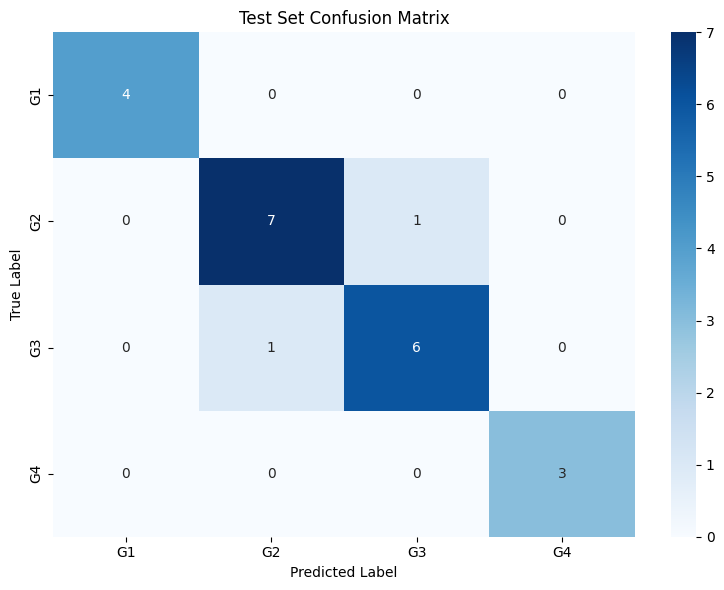

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torch.optim.lr_scheduler import ReduceLROnPlateau # Added for LR scheduling
from pathlib import Path
import re
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import copy # For saving best model state in early stopping

# --- Configuration ---
DATA_ROOT = Path("../data/GAMEEMO") # User updated path
NUM_EPOCHS = 50 # Increased epochs as early stopping will manage it
BATCH_SIZE = 16 
LEARNING_RATE = 0.001
TEST_SPLIT_RATIO = 0.2
NUM_CLASSES = 4 
NUM_CHANNELS = 14 
FIXED_SEQUENCE_LENGTH = 3000 

# Early Stopping Configuration
EARLY_STOPPING_PATIENCE = 7 # Number of epochs to wait for improvement before stopping
EARLY_STOPPING_MIN_DELTA = 0.001 # Minimum change to qualify as an improvement

# --- 1. Data Loading and Preprocessing ---

def g_label(fn_name):
    """Extracts game label (0-3) from a filename."""
    match = re.search(r"G([1-4])", fn_name)
    if match:
        return int(match.group(1)) - 1
    raise ValueError(f"Could not extract label from {fn_name}")

class EEGDataset(Dataset):
    """
    Custom PyTorch Dataset for GAMEEMO EEG data.
    """
    def __init__(self, data_root, fixed_sequence_length, transform=None):
        self.data_root = Path(data_root)
        self.fixed_sequence_length = fixed_sequence_length
        self.transform = transform
        self.eeg_paths = []
        self.labels = []
        self._load_data()

    def _load_data(self):
        """Loads all EEG file paths and their corresponding labels."""
        # print(f"Scanning data root: {self.data_root.resolve()}") # Reduced verbosity
        if not self.data_root.exists():
            print(f"ERROR: Data root directory '{self.data_root.resolve()}' does not exist.")
            return

        subject_count = 0
        for subj_dir in self.data_root.iterdir():
            if subj_dir.is_dir() and re.fullmatch(r"\(S\d{2}\)", subj_dir.name):
                subject_count +=1
                csv_dir = subj_dir / "Preprocessed EEG Data" / ".csv format"
                if csv_dir.exists():
                    for p in csv_dir.glob("*.csv"):
                        try:
                            label = g_label(p.name)
                            self.eeg_paths.append(p)
                            self.labels.append(label)
                        except ValueError:
                            pass 
        
        if subject_count == 0:
            print(f"Warning: No subject directories like (SXX) found in {self.data_root.resolve()}")
        print(f"Found {len(self.eeg_paths)} recordings from {subject_count} subjects.")
        if not self.eeg_paths:
            print("CRITICAL: No EEG files were found. Please check the DATA_ROOT path and dataset structure.")

    def __len__(self):
        return len(self.eeg_paths)

    def __getitem__(self, idx):
        file_path = self.eeg_paths[idx]
        label = self.labels[idx]

        try:
            df = pd.read_csv(file_path, header=0) 

            if df.shape[1] == NUM_CHANNELS + 1:
                df = df.iloc[:, :NUM_CHANNELS]
            elif df.shape[1] == NUM_CHANNELS:
                pass
            else:
                return None, None

            eeg_data = df.values.astype(np.float32)

            if eeg_data.shape[0] > self.fixed_sequence_length:
                eeg_data = eeg_data[:self.fixed_sequence_length, :]
            else:
                padding_rows = self.fixed_sequence_length - eeg_data.shape[0]
                if padding_rows > 0: 
                    padding = np.zeros((padding_rows, NUM_CHANNELS), dtype=np.float32)
                    eeg_data = np.vstack((eeg_data, padding))
            
            if eeg_data.shape[1] != NUM_CHANNELS:
                return None, None

            eeg_data = eeg_data.T 

            if self.transform:
                eeg_data = self.transform(eeg_data)

            return torch.tensor(eeg_data, dtype=torch.float32), torch.tensor(label, dtype=torch.long)

        except pd.errors.EmptyDataError:
            return None, None
        except Exception: 
            return None, None

def custom_collate_fn(batch):
    """
    Collate function to filter out None items from the batch.
    """
    batch = [item for item in batch if item[0] is not None and item[1] is not None]
    if not batch: 
        return None, None 
    return torch.utils.data.dataloader.default_collate(batch)


# --- 2. Model Architecture (CNN + LSTM) ---
class EEG_CNN_LSTM(nn.Module):
    def __init__(self, num_classes, num_channels, sequence_length, lstm_hidden_size=128, num_lstm_layers=1, dropout_rate=0.5):
        super(EEG_CNN_LSTM, self).__init__()
        self.num_channels = num_channels
        self.sequence_length = sequence_length

        # CNN part
        self.conv1 = nn.Conv1d(in_channels=num_channels, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm1d(32) # Added BatchNorm
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.dropout_cnn = nn.Dropout(dropout_rate / 2) # Dropout in CNN

        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm1d(64) # Added BatchNorm
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)
        
        self.lstm_input_features = 64
        # LSTM part
        self.lstm = nn.LSTM(input_size=self.lstm_input_features,
                              hidden_size=lstm_hidden_size,
                              num_layers=num_lstm_layers,
                              batch_first=True,
                              dropout=dropout_rate if num_lstm_layers > 1 else 0) # LSTM dropout if multiple layers

        # FC part
        self.dropout_fc = nn.Dropout(dropout_rate) # Dropout before FC
        self.fc = nn.Linear(lstm_hidden_size, num_classes)

    def forward(self, x):
        # x shape: (batch_size, num_channels, sequence_length)
        
        x = self.pool1(self.relu1(self.bn1(self.conv1(x))))
        x = self.dropout_cnn(x)
        x = self.pool2(self.relu2(self.bn2(self.conv2(x))))
        
        x = x.permute(0, 2, 1) # (batch_size, sequence_length / 4, 64)
        
        lstm_out, (h_n, c_n) = self.lstm(x)
        x = h_n[-1] 

        x = self.dropout_fc(x)
        x = self.fc(x)
        return x

# --- 3. Training and Evaluation Functions ---
def train_model(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    progress_bar = tqdm(train_loader, desc="Training", leave=False, unit="batch")
    for inputs, labels in progress_bar:
        if inputs is None or labels is None : 
            continue 
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()
        
        if total_samples > 0:
            progress_bar.set_postfix(loss=running_loss/total_samples, acc=correct_predictions/total_samples)

    if total_samples == 0:
        return 0.0, 0.0

    epoch_loss = running_loss / total_samples
    epoch_acc = correct_predictions / total_samples
    return epoch_loss, epoch_acc

def evaluate_model(model, val_loader, criterion, device, eval_type="Validation"):
    model.eval()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    all_labels = []
    all_predictions = []

    progress_bar = tqdm(val_loader, desc=eval_type, leave=False, unit="batch")
    with torch.no_grad():
        for inputs, labels in progress_bar:
            if inputs is None or labels is None :
                continue 
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total_samples += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()
            
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

            if total_samples > 0:
                progress_bar.set_postfix(loss=running_loss/total_samples, acc=correct_predictions/total_samples)
    
    if total_samples == 0:
        return 0.0, 0.0, [], []
        
    epoch_loss = running_loss / total_samples
    epoch_acc = correct_predictions / total_samples
    return epoch_loss, epoch_acc, all_labels, all_predictions

def plot_confusion_matrix(cm, class_names, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout() 
    plt.show()

# --- Main Execution ---
if __name__ == '__main__':
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    print("Initializing dataset...")
    full_dataset = EEGDataset(data_root=DATA_ROOT, fixed_sequence_length=FIXED_SEQUENCE_LENGTH)

    if not full_dataset.eeg_paths:
        print("No data loaded. Exiting.")
        exit()
        
    num_samples = len(full_dataset)
    test_size = int(TEST_SPLIT_RATIO * num_samples)
    train_size = num_samples - test_size
    
    if train_size <= 0 or test_size <= 0:
        min_samples_needed = int(1 / TEST_SPLIT_RATIO) if TEST_SPLIT_RATIO > 0 else 2
        print(f"Dataset too small for splitting with ratio {TEST_SPLIT_RATIO}. Need at least {min_samples_needed} samples.")
        if num_samples > 0:
             train_dataset = full_dataset
             test_dataset = full_dataset 
             print(f"Warning: Using all {num_samples} samples for training and testing.")
        else:
            print("CRITICAL: Dataset is empty. Cannot proceed.")
            exit()
    else:
        train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

    print(f"Number of training samples: {len(train_dataset)}")
    print(f"Number of testing samples: {len(test_dataset)}")

    # User mentioned num_workers=0 was necessary
    num_workers = 0 
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=custom_collate_fn, num_workers=num_workers, pin_memory=True if device.type=='cuda' else False)
    # For validation/test, shuffle is typically False
    val_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=custom_collate_fn, num_workers=num_workers, pin_memory=True if device.type=='cuda' else False)

    model = EEG_CNN_LSTM(num_classes=NUM_CLASSES, num_channels=NUM_CHANNELS, sequence_length=FIXED_SEQUENCE_LENGTH, dropout_rate=0.5).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
    
    # Learning Rate Scheduler
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=3, verbose=True, min_lr=1e-6)

    # Early Stopping initialization
    best_val_loss = float('inf')
    epochs_no_improve = 0
    best_model_state = None # To store the state_dict of the best model

    print("\n--- Starting Training ---")
    for epoch in range(NUM_EPOCHS):
        train_loss, train_acc = train_model(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc, _, _ = evaluate_model(model, val_loader, criterion, device, eval_type="Validation")

        current_lr = optimizer.param_groups[0]['lr']
        print(f"Epoch {epoch+1}/{NUM_EPOCHS} => "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f} | "
              f"LR: {current_lr:.1e}")

        # LR Scheduler step (based on validation loss)
        scheduler.step(val_loss)

        # Early Stopping check
        if val_loss < best_val_loss - EARLY_STOPPING_MIN_DELTA:
            best_val_loss = val_loss
            epochs_no_improve = 0
            best_model_state = copy.deepcopy(model.state_dict()) # Save the best model
            # print(f"Validation loss improved to {best_val_loss:.4f}. Saving model state.")
        else:
            epochs_no_improve += 1
            # print(f"Validation loss did not improve for {epochs_no_improve} epoch(s).")

        if epochs_no_improve >= EARLY_STOPPING_PATIENCE:
            print(f"\nEarly stopping triggered after {epoch+1} epochs due to no improvement in validation loss for {EARLY_STOPPING_PATIENCE} consecutive epochs.")
            print(f"Best validation loss achieved: {best_val_loss:.4f}")
            if best_model_state:
                model.load_state_dict(best_model_state) # Load the best model state before final evaluation
            break
            
    print("\n--- Training Finished ---")

    # Load the best model state if early stopping occurred and a best state was saved
    if best_model_state:
        print("Loading best model state for final evaluation.")
        model.load_state_dict(best_model_state)

    print("\n--- Evaluating on Test Set (with best model) ---")
    test_loss, test_acc, true_labels, predicted_labels = evaluate_model(model, val_loader, criterion, device, eval_type="Test") # Using val_loader as test_loader
    print(f"Final Test Loss: {test_loss:.4f}")
    print(f"Final Test Accuracy: {test_acc:.4f}")

    if true_labels and predicted_labels: 
        class_names = [f"G{i+1}" for i in range(NUM_CLASSES)] 
        print("\nClassification Report:")
        print(classification_report(true_labels, predicted_labels, target_names=class_names, zero_division=0))

        cm = confusion_matrix(true_labels, predicted_labels)
        plot_confusion_matrix(cm, class_names=class_names, title="Test Set Confusion Matrix")
    else:
        print("Could not generate classification report or confusion matrix.")

    # Example of saving the final best model
    # if best_model_state:
    #    torch.save(best_model_state, 'eeg_emotion_best_model.pth')
    #    print("Best model saved to eeg_emotion_best_model.pth")
    # else: # If early stopping wasn't triggered or no improvement, save current model
    #    torch.save(model.state_dict(), 'eeg_emotion_final_model.pth')
    #    print("Final model saved to eeg_emotion_final_model.pth")

